<h2> LDA with static stopping

In [5]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit
from mne.decoding import CSP

current_directory = os.path.abspath('')

project_root = os.path.abspath(os.path.join(current_directory, '..', '..', '..', '..'))

sys.path.append(project_root)

print("ROOT:", project_root)
from Early_predict_UQ.data.make_dataset import make_data

# epoch tmin  = 2 and tmax = 6 , as the motor imagery task lasted in that time

def run_expanding_classification(subjects, initial_window_length, expansion_rate, sfreq,  prediction_time):
    scores_across_subjects = []
    current_person = 0
    for person in subjects:
        current_person += 1
        print("Person %d" % (person))
        subject= [person]
        epochs, labels = make_data(subject)
        epochs_train = epochs.copy()
        labels = epochs.events[:, -1] - 4
        epochs_data = epochs.get_data(copy=False)
        epochs_data_train = epochs_train.get_data(copy=False)

        cv = ShuffleSplit(2, test_size=0.2, random_state=42)
        cv_split = cv.split(epochs_data_train)
        scores_cv_splits = []

        lda = LinearDiscriminantAnalysis()
        csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
        current_cv = 0 
        for train_idx, test_idx in cv_split:
            current_cv += 1
            y_train, y_test = labels[train_idx], labels[test_idx]
            X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
            lda.fit(X_train, y_train)
            w_start = np.arange(0, epochs_data.shape[2] - initial_window_length, expansion_rate) 
            scores_across_epochs = []
            for epoch_idx in range(len(test_idx)):
                for n, window_start in enumerate(w_start):
                    window_length = initial_window_length + n * expansion_rate
                    X_test_window = csp.transform(epochs_data_train[test_idx][:, :,  window_start:(window_start + window_length)])
                    X_test_epoch_window = X_test_window[epoch_idx]
                    print("window_start:", window_start)
                    print("prediction_time:", prediction_time)
                    if window_start == prediction_time:
                        score = lda.score(X_test_epoch_window.reshape(1, -1), [y_test[epoch_idx]])
                        scores_across_epochs.append(score)
                        break
            if current_cv == 1:
                scores_cv_splits = np.array(scores_across_epochs)
            else:
                scores_cv_splits = np.vstack((scores_cv_splits,np.array(scores_across_epochs)))

        mean_scores_across_cv = np.mean(scores_cv_splits, axis=0)
        if current_person == 1:
            scores_across_subjects  = np.array(mean_scores_across_cv)
        else:
            scores_across_subjects = np.vstack((scores_across_subjects,np.array(mean_scores_across_cv)))

        mean_scores_across_subjects = np.mean(scores_across_subjects, axis=0)
        accuracy = np.mean(mean_scores_across_subjects)
    return accuracy, epochs, labels

if __name__ == "__main__":
    subjects = [1, 2, 3, 4]  # 9 subjects
    sfreq = 250      

    initial_window_length = int(sfreq * 0.5)  
    expansion_rate = int(sfreq * 0.3)   

    epochs, labels = make_data([1]) # just to access the epoch.shape
    epochs_data = epochs.get_data(copy=False)
    prediction_times = np.arange(0, epochs_data.shape[2] - initial_window_length, expansion_rate)

    accuracy_array = []

    #something like this
    print("accuracy_array: ", accuracy_array)
    print(" prediction_times: ",  prediction_times)
    for current_pred_time, prediction_time in enumerate(prediction_times):
        print(f"prediction_time: {current_pred_time + 1} / {len(prediction_times)}")
        accuracy, epochs, labels = run_expanding_classification(subjects, initial_window_length, expansion_rate, sfreq, prediction_time)
        accuracy_array.append(accuracy)

    accuracy_array = np.array(accuracy_array)
    print("accuracy_array: ", accuracy_array)


Choosing from all possible events


ROOT: /workspaces/UQ_Early_prediction_MI_BCI
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)
Choosing from all possible events


accuracy_array:  []
 prediction_times:  [  0  75 150 225 300 375 450 525 600 675 750 825]
prediction_time: 1 / 12
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data with rank=None
    Using tolerance 3.3e-05 (2.2e-16 eps * 22 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
pr

Choosing from all possible events


window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
Person 2
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata wit

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22

Choosing from all possible events


window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
Person 3
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data with rank=None


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
Person 4
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata wit

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
window_start: 0
prediction_time: 0
prediction_time: 2 /

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 

Choosing from all possible events


window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 75
window_start: 

Choosing from all possible events


window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
Person 3
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data with rank=None
    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 75
window_start

Choosing from all possible events


window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 7

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 75
window_s

Choosing from all possible events


window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 75
prediction_time: 75
window_start: 0
prediction_time: 75
window_start: 7

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 150
window_st

Choosing from all possible events


window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
Person 3
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding met

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 150
window_star

Choosing from all possible events


window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 150
window_

Choosing from all possible events


window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
window_start: 0
prediction_time: 150
window_start: 75
prediction_time: 150
window_start: 150
prediction_time: 150
prediction_time: 4 / 12
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data with rank=None


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.3e-05 (2.2e-16 eps * 22 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

Choosing from all possible events


window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
Person 2
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Computing rank from data with rank=None
    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Es

Choosing from all possible events


window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
wind

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 225
window_star

Choosing from all possible events


window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
Person 4
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding 

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
window_start: 0
prediction_time: 225
window_start: 75
prediction_time: 225
window_start: 150
prediction_time: 225
window_start: 225
prediction_time: 225
wind

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_st

Choosing from all possible events


window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
win

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
Person 3
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data with 

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
Person 4
Adding metadata with 3 columns


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 300
window_

Choosing from all possible events


window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
window_start: 225
prediction_time: 300
window_start: 300
prediction_time: 300
window_start: 0
prediction_time: 300
window_start: 75
prediction_time: 300
window_start: 150
prediction_time: 300
w

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -

Choosing from all possible events


window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 37

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 375
window_star

Choosing from all possible events


window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 375
window_

Choosing from all possible events


window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375
window_start: 75
prediction_time: 375
window_start: 150
prediction_time: 375
window_start: 225
prediction_time: 375
window_start: 300
prediction_time: 375
window_start: 375
prediction_time: 375
window_start: 0
prediction_time: 375


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -

Choosing from all possible events


window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
Person 2
Adding metadata with 3 co

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 45

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
window_start: 0
prediction_time: 450
window_start: 75
prediction_time: 450
window_start: 150
prediction_time: 450
window_start: 225
prediction_time: 450
window_start: 300
prediction_time: 450
window_start: 375
prediction_time: 450
window_start: 450
prediction_time: 450
prediction_time: 8 / 12
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 525
window_st

Choosing from all possible events


window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_s

Choosing from all possible events


window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
window_start: 0
prediction_time: 525
window_start: 75
prediction_time: 525
window_start: 150
prediction_time: 525
window_start: 225
prediction_time: 525
window_start: 300
prediction_time: 525
window_start: 375
prediction_time: 525
window_start: 450
prediction_time: 525
window_start: 525
prediction_time: 525
prediction_time: 9 / 12
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.3e-05 (2.2e-16 eps * 22 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

Choosing from all possible events


window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_tim

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
window_start: 0
prediction_time: 600
window_start: 75
prediction_time: 600
window_start: 150
prediction_time: 600
window_start: 225
prediction_time: 600
window_start: 300
prediction_time: 600
window_start: 375
prediction_time: 600
window_start: 450
prediction_time: 600
window_start: 525
prediction_time: 600
window_start: 600
prediction_time: 600
prediction_time: 10 / 12
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Addi

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.3e-05 (2.2e-16 eps * 22 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

Choosing from all possible events


window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
Person 2
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 column

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_ti

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_tim

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time: 675
window_start: 225
prediction_time: 675
window_start: 300
prediction_time: 675
window_start: 375
prediction_time: 675
window_start: 450
prediction_time: 675
window_start: 525
prediction_time: 675
window_start: 600
prediction_time: 675
window_start: 675
prediction_time: 675
window_start: 0
prediction_time: 675
window_start: 75
prediction_time: 675
window_start: 150
prediction_time:

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.3e-05 (2.2e-16 eps * 22 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

Choosing from all possible events


window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
window_start: 0
prediction_time: 750
window_start: 75
prediction_time: 750
window_start: 150
prediction_time: 750
window_start: 225
prediction_time: 750
window_start: 300
prediction_time: 750
window_start: 375
prediction_time: 750
window_start: 450
prediction_time: 750
window_start: 525
prediction_time: 750
window_start: 600
prediction_time: 750
window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
window_start: 0
prediction_time: 750
window_start: 75
prediction_time: 750
window_start: 150
prediction_time: 750
window_start: 225
prediction_time: 750
window_start: 300
prediction_time: 750
window_start: 375
prediction_time: 750
window_start: 450
prediction_time: 750
window_start: 525
prediction_time: 750
window_start: 600
prediction_time: 750
window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
Person 2
Adding metadata with 3 columns
Adding metadata with 3 columns

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 150
prediction_time: 750
window_start: 225
prediction_time: 750
window_start: 300
prediction_time: 750
window_start: 375
prediction_time: 750
window_start: 450
prediction_time: 750
window_start: 525
prediction_time: 750
window_start: 600
prediction_time: 750
window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
window_start: 0
prediction_time: 750
window_start: 75
prediction_time: 750
window_start: 150
prediction_time: 750
window_start: 225
prediction_time: 750
window_start: 300
prediction_time: 750
window_start: 375
prediction_time: 750
window_start: 450
prediction_time: 750
window_start: 525
prediction_time: 750
window_start: 600
prediction_time: 750
window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
window_start: 0
prediction_time: 750
window_start: 75
prediction_time: 750
window_start: 150
prediction_time: 750
window_start: 225
prediction_time: 750
window_start: 300
prediction_time: 750
window_start: 375
prediction_ti

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 525
prediction_time: 750
window_start: 600
prediction_time: 750
window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
window_start: 0
prediction_time: 750
window_start: 75
prediction_time: 750
window_start: 150
prediction_time: 750
window_start: 225
prediction_time: 750
window_start: 300
prediction_time: 750
window_start: 375
prediction_time: 750
window_start: 450
prediction_time: 750
window_start: 525
prediction_time: 750
window_start: 600
prediction_time: 750
window_start: 675
prediction_time: 750
window_start: 750
prediction_time: 750
Person 4
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 ma

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.1e-05 (2.2e-16 eps * 22 dim * 6.3e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: ra

Choosing from all possible events


window_start: 750
prediction_time: 750
prediction_time: 12 / 12
Person 1
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data with rank=None


/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 3.3e-05 (2.2e-16 eps * 22 dim * 6.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.4e-05 (2.2e-16 eps * 22 dim * 7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.7e-05 (2.2e-16 eps * 22 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank

Choosing from all possible events


window_start: 150
prediction_time: 825
window_start: 225
prediction_time: 825
window_start: 300
prediction_time: 825
window_start: 375
prediction_time: 825
window_start: 450
prediction_time: 825
window_start: 525
prediction_time: 825
window_start: 600
prediction_time: 825
window_start: 675
prediction_time: 825
window_start: 750
prediction_time: 825
window_start: 825
prediction_time: 825
window_start: 0
prediction_time: 825
window_start: 75
prediction_time: 825
window_start: 150
prediction_time: 825
window_start: 225
prediction_time: 825
window_start: 300
prediction_time: 825
window_start: 375
prediction_time: 825
window_start: 450
prediction_time: 825
window_start: 525
prediction_time: 825
window_start: 600
prediction_time: 825
window_start: 675
prediction_time: 825
window_start: 750
prediction_time: 825
window_start: 825
prediction_time: 825
Person 2
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metad

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 5.4e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8e-05 (2.2e-16 eps * 22 dim * 9.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 825
prediction_time: 825
window_start: 0
prediction_time: 825
window_start: 75
prediction_time: 825
window_start: 150
prediction_time: 825
window_start: 225
prediction_time: 825
window_start: 300
prediction_time: 825
window_start: 375
prediction_time: 825
window_start: 450
prediction_time: 825
window_start: 525
prediction_time: 825
window_start: 600
prediction_time: 825
window_start: 675
prediction_time: 825
window_start: 750
prediction_time: 825
window_start: 825
prediction_time: 825
Person 3
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
576 matching events found
No baseline correction applied
Computing rank from data wi

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


    Using tolerance 4.4e-05 (2.2e-16 eps * 22 dim * 9e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.7e-05 (2.2e-16 eps * 22 dim * 9.5e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-05 (2.2e-16 eps * 22 dim * 1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-05 (2.2e-16 eps * 22 dim * 1.1e+10  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 

Choosing from all possible events


window_start: 375
prediction_time: 825
window_start: 450
prediction_time: 825
window_start: 525
prediction_time: 825
window_start: 600
prediction_time: 825
window_start: 675
prediction_time: 825
window_start: 750
prediction_time: 825
window_start: 825
prediction_time: 825
window_start: 0
prediction_time: 825
window_start: 75
prediction_time: 825
window_start: 150
prediction_time: 825
window_start: 225
prediction_time: 825
window_start: 300
prediction_time: 825
window_start: 375
prediction_time: 825
window_start: 450
prediction_time: 825
window_start: 525
prediction_time: 825
window_start: 600
prediction_time: 825
window_start: 675
prediction_time: 825
window_start: 750
prediction_time: 825
window_start: 825
prediction_time: 825
window_start: 0
prediction_time: 825
window_start: 75
prediction_time: 825
window_start: 150
prediction_time: 825
window_start: 225
prediction_time: 825
window_start: 300
prediction_time: 825
window_start: 375
prediction_time: 825
window_start: 450
prediction_ti

/workspaces/UQ_Early_prediction_MI_BCI/.conda/lib/python3.11/site-packages/moabb/paradigms/base.py:354: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-05 (2.2e-16 eps * 22 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-05 (2.2e-16 eps * 22 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using EMPIRICAL
Done.
window_start: 0
prediction_time: 825
window_

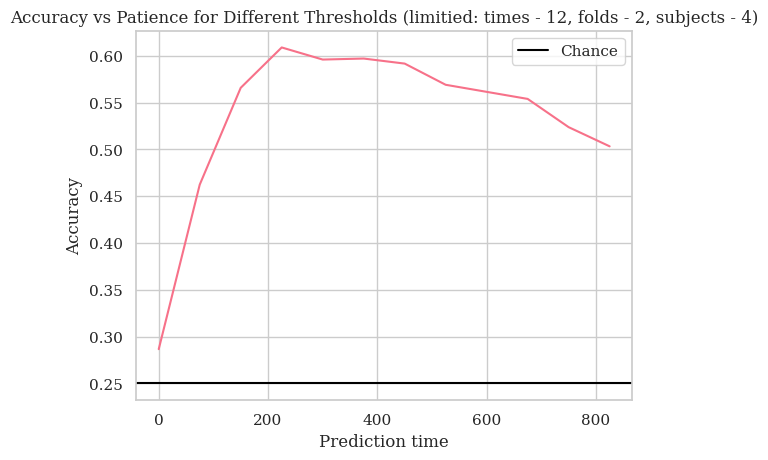

In [6]:


class_balance = np.zeros(4)
for i in range(4):
    class_balance[i] = np.mean(labels == i)
class_balance = np.max(class_balance)

plt.title("Accuracy over time")
plt.xlabel("Prediction time")
plt.ylabel("Accuracy")

plt.plot(prediction_times, accuracy_array)
plt.axhline(class_balance, linestyle="-", color="k", label="Chance")
plt.title('Accuracy vs Patience for Different Thresholds (limitied: times - 12, folds - 2, subjects - 4)')
plt.legend()
plt.grid(True)
plt.show()